In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import log as ln
from termcolor import colored
from scipy.stats import norm

Determina el número de intervalos que debe tener la tabla de frecuencias

In [105]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

Método que crea los intervalos que debe tener la tabla de frecuencias

In [106]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

Método que crea la marca de clase

In [107]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

Crea tabla de frecuencia para datos cuantitativos

In [108]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic      

Crea tabla de frecuencia para datos categoricos

In [109]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

Calcula el coeficiente de asimetria y de curtosis de la distribución

# Preparación de los datos

#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


In [110]:
print(colored(f'Cargamos los datos del conjunto de tráfico mineros identificados', attrs=['bold']))
data = pd.read_csv('./data_identificada.csv')
data.head()

Cargamos los datos del conjunto de tráfico mineros identificados


,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency
0,310,11-csves/17.csv,28,TCP,NaN,NaN,8.21225,14.290,25.6010,518.083,...,4444.0,NaN,7.00,8.0,14.75,362.0,1054.0,1918.0,mine,Etherium
1,185,30-csves/4.csv,2,TCP,NaN,NaN,173.24750,173.265,173.2825,346.530,...,52447.0,NaN,8.00,8.0,8.00,2149.0,4138.0,6127.0,mine,Bitcoin
2,539,31-csves/3.csv,13,TCP,NaN,NaN,3.21500,9.253,47.2220,308.294,...,4444.0,NaN,3.00,6.0,25.00,307.0,994.0,1355.0,mine,Etherium
3,926,100-csves/0.csv,2,TCP,NaN,NaN,300.01150,300.012,300.0125,600.024,...,58780.0,NaN,169.25,175.5,181.75,16041.0,24096.0,32151.0,mine,Etherium
4,430,14-csves/20.csv,2,TCP,NaN,NaN,596.98150,596.982,596.9825,1193.964,...,4444.0,NaN,319.25,330.5,341.75,29932.5,44353.0,58773.5,mine,Etherium


# Análisis inicial

In [111]:
print(colored(f'Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna.', attrs=['bold']))
data.info()

Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Data columns (total 33 columns):
index              4733 non-null int64
Name               4733 non-null object
Netflows           4733 non-null int64
First_Protocol     4733 non-null object
Second_Protocol    2272 non-null object
Third_Protocol     129 non-null object
p1_d               4733 non-null float64
p2_d               4733 non-null float64
p3_d               4733 non-null float64
duration           4733 non-null float64
max_d              4733 non-null float64
min_d              4733 non-null float64
#packets           4733 non-null int64
Avg_bps            4733 non-null int64
Avg_pps            4733 non-null int64
Avg_bpp            4733 non-null int64
#Bytes             4733 non-null int64
#sp                4733 non-null int64
#dp                4733 non-null int

In [112]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 4733 registros y 33 columnas


### Inspección datos faltantes

In [113]:
print(colored(f'Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)', attrs=['bold']))
avaliable = data.isnull()
avaliable = avaliable.apply(pd.Series.value_counts)
avaliable.T

Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)


,False,True
index,4733.0,NaN
Name,4733.0,NaN
Netflows,4733.0,NaN
First_Protocol,4733.0,NaN
Second_Protocol,2272.0,2461.0
Third_Protocol,129.0,4604.0
p1_d,4733.0,NaN
p2_d,4733.0,NaN
p3_d,4733.0,NaN
duration,4733.0,NaN


In [114]:
porce_second_pr = np.round(avaliable['Second_Protocol'][1] / data.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de la columna segundo protocolo(second protocol) con respecto \n al número total de registros es de {porce_second_pr}%.', attrs=['bold']))

El porcentaje de los datos faltantes de la columna segundo protocolo(second protocol) con respecto 
 al número total de registros es de 52.0%.


In [115]:
porce_third_pr = np.round(avaliable['Third_Protocol'][1] / data.shape[0],3) * 100
print(colored(f'El porcentaje de los datos faltantes de tercer protocolo(third_Protocol) con respecto al número total de registros \n es de {porce_third_pr}%.', attrs=['bold']))

El porcentaje de los datos faltantes de tercer protocolo(third_Protocol) con respecto al número total de registros 
 es de 97.3%.


In [116]:
porce_sec_sp = np.round(avaliable['second_sp'][1] / data.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 0.7000000000000001%.


In [117]:
porce_third_sp = np.round(avaliable['third_sp'][1] / data.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de third_sp con respecto al número total de registros es de {porce_third_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de third_sp con respecto al número total de registros es de 45.9%.


In [118]:
porce_sec_dp = np.round(avaliable['second_dp'][1] / data.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_dp con respecto al número total de registros es de {porce_sec_dp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_dp con respecto al número total de registros es de 0.7000000000000001%.


In [119]:
porce_third_sp = np.round(avaliable['third_dp'][1] / data.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de third_dp con respecto al número total de registros es de {porce_third_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de third_dp con respecto al número total de registros es de 45.800000000000004%.


### Inspección de tipo de dato incorrecto

### Estructuración del conjunto de datos
Agrupación de las variables cuantitativas y categóricas por separado.

In [120]:
data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric = [c for c in data_numeric.index if data_numeric[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas

In [121]:
data_numeric = ['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']
print(data_numeric)

['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']


Variables categoricas

In [122]:
data_object = ['First_Protocol', 'Second_Protocol', 'Third_Protocol', 'Cryptocurrency']
print(data_object)

['First_Protocol', 'Second_Protocol', 'Third_Protocol', 'Cryptocurrency']


# Inspección de la variable objetivo

### Balance del conjunto de datos

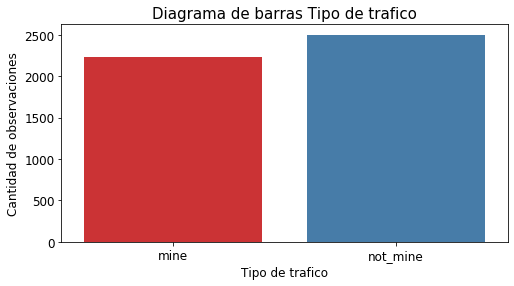

In [123]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(x='Type', data=data, palette="Set1")
ax.set_title("Diagrama de barras Tipo de trafico", size=15)
ax.set_xlabel('Tipo de trafico', size = 12)
ax.set_ylabel('Cantidad de observaciones',  size = 12)
ax.tick_params(labelsize = 12)

In [124]:
data['Type'].describe()

count         4733
unique           2
top       not_mine
freq          2501
Name: Type, dtype: object

# Inspección de Datos Categoricos

In [125]:
print(colored(f'Analisis descriptivo no agrupado', attrs=['bold']))
data[data_object].describe()

Analisis descriptivo no agrupado


,First_Protocol,Second_Protocol,Third_Protocol,Cryptocurrency
count,4733,2272,129,2232
unique,4,4,3,5
top,TCP,UDP,ICMP6,Etherium
freq,4227,1996,92,959


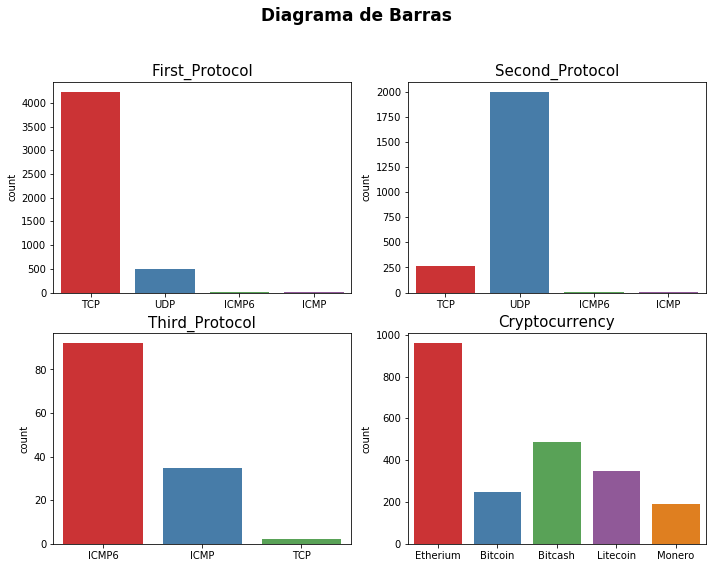

In [126]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize = (10,8))
ax = ax.flat
for i, col in enumerate(data_object):
    sns.countplot(x=col, data=data, palette="Set1", ax = ax[i])
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 10)
    ax[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Diagrama de Barras', fontsize = 17, fontweight = "bold");

In [127]:
data_object_list = data_object
tables_frequency_cualitative = []
namess = data_object
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

In [128]:
print(colored(f'Datos Categoricos Agrupados',attrs=['bold']))
display(tables_frequency_cualitative[0],tables_frequency_cualitative[1],tables_frequency_cualitative[2],tables_frequency_cualitative[3])

Datos Categoricos Agrupados


,First_Protocol,ni,fi,Ni,Fi
0,TCP,4227,0.89309,4227,0.89309
1,UDP,504,0.10649,4731,0.99958
2,ICMP6,1,0.00021,4732,0.99979
3,ICMP,1,0.00021,4733,1
5,Total,4733,,,


,Second_Protocol,ni,fi,Ni,Fi
0,NaN,2461,0.51997,2461,0.51997
1,TCP,1996,0.42172,4457,0.94169
2,UDP,267,0.05641,4724,0.9981
3,ICMP6,6,0.00127,4730,0.99937
4,ICMP,3,0.00063,4733,1
6,Total,4733,,,


,Third_Protocol,ni,fi,Ni,Fi
0,NaN,4604,0.97274,4604,0.97274
1,ICMP6,92,0.01944,4696,0.99218
2,ICMP,35,0.00739,4731,0.99957
3,TCP,2,0.00042,4733,0.99999
5,Total,4733,,,


,Cryptocurrency,ni,fi,Ni,Fi
0,Etherium,2501,0.52842,2501,0.52842
1,Bitcoin,959,0.20262,3460,0.73104
2,NaN,485,0.10247,3945,0.83351
3,Bitcash,349,0.07374,4294,0.90725
4,Litecoin,247,0.05219,4541,0.95944
5,Monero,192,0.04057,4733,1.00001
7,Total,4733,,,


# Inspección de Datos Cuantitativos

In [129]:
print(colored(f'Variables Cuantitativas', attrs=['bold']))
data[data_numeric].describe().T

Variables Cuantitativas


,count,mean,std,min,25%,50%,75%,max
Netflows,4733.0,9.824128e+01,1.915744e+02,1.0,2.000,23.0000,1.100000e+02,3.313000e+03
p1_d,4733.0,1.334991e+02,1.904751e+02,0.0,0.000,13.9345,2.475993e+02,5.995330e+02
p2_d,4733.0,1.489353e+02,1.851526e+02,0.0,0.813,58.3345,2.483130e+02,5.995330e+02
p3_d,4733.0,1.698991e+02,1.768830e+02,0.0,37.342,96.0300,2.519127e+02,5.995330e+02
duration,4733.0,3.857289e+03,7.896291e+03,0.0,524.756,1055.2150,3.830027e+03,1.001191e+05
max_d,4733.0,2.058187e+02,1.622635e+02,0.0,88.019,159.9850,2.756250e+02,5.995330e+02
min_d,4733.0,1.219167e+02,1.949303e+02,0.0,0.000,0.0000,2.474560e+02,5.995330e+02
#packets,4733.0,2.673519e+03,7.140684e+03,1.0,54.000,332.0000,5.107000e+03,1.987940e+05
Avg_bps,4733.0,8.216193e+04,2.251706e+05,0.0,491.000,1279.0000,1.254280e+05,7.161568e+06
Avg_pps,4733.0,1.402240e+01,3.577477e+01,0.0,0.000,1.0000,1.900000e+01,1.333000e+03


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


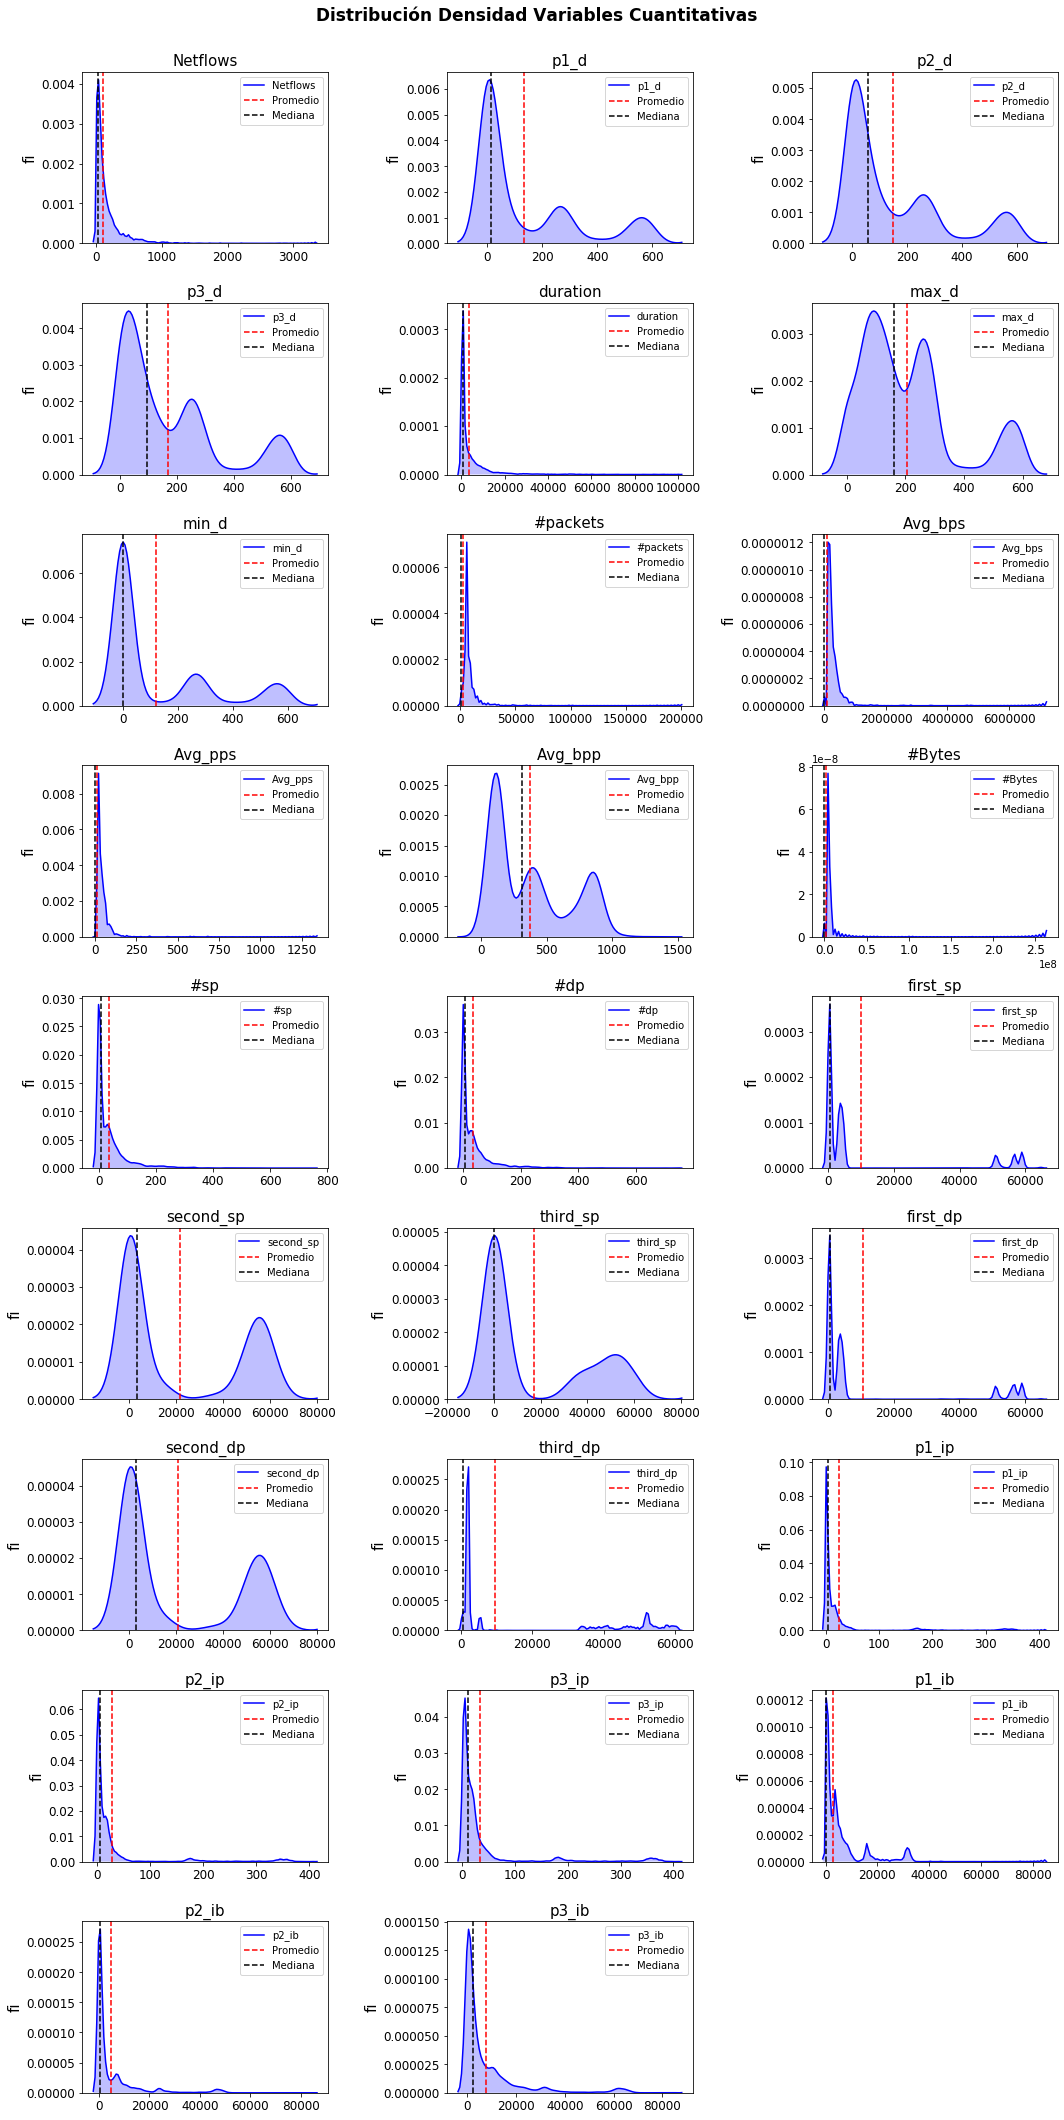

In [130]:
fig, ax = plt.subplots(nrows = 9, ncols = 3, figsize = (15,30))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.kdeplot(data[col], color='blue', shade=True, ax = ax[i])
    ax[i].axvline(data[col].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax[i].axvline(data[col].median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_ylabel('fi',size=15)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Densidad Variables Cuantitativas', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[26])

In [131]:
informe_asimetria_kurtosis = pd.DataFrame(columns = data_numeric, index = ['Coeficiente_Asimetria','Coeficiente_Curtosis'])
for i in data_numeric:
    temp = []
    temp.append(data[i].skew())
    temp.append(data[i].kurt())
    informe_asimetria_kurtosis[i] = temp
informe_asimetria_kurtosis

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,third_sp,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib
Coeficiente_Asimetria,5.126296,1.297105,1.218563,1.143464,4.878084,1.022449,1.342877,13.328879,12.972739,15.317764,...,0.764612,1.779636,0.601989,1.782343,3.752210,3.710988,3.589257,4.019052,3.172156,2.879763
Coeficiente_Curtosis,47.864906,0.327065,0.257082,0.234246,32.972115,0.259034,0.355841,290.702150,304.806459,452.450504,...,-1.245960,1.249238,-1.545151,1.365050,13.478351,13.243028,12.535532,22.684737,11.129250,8.809831


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


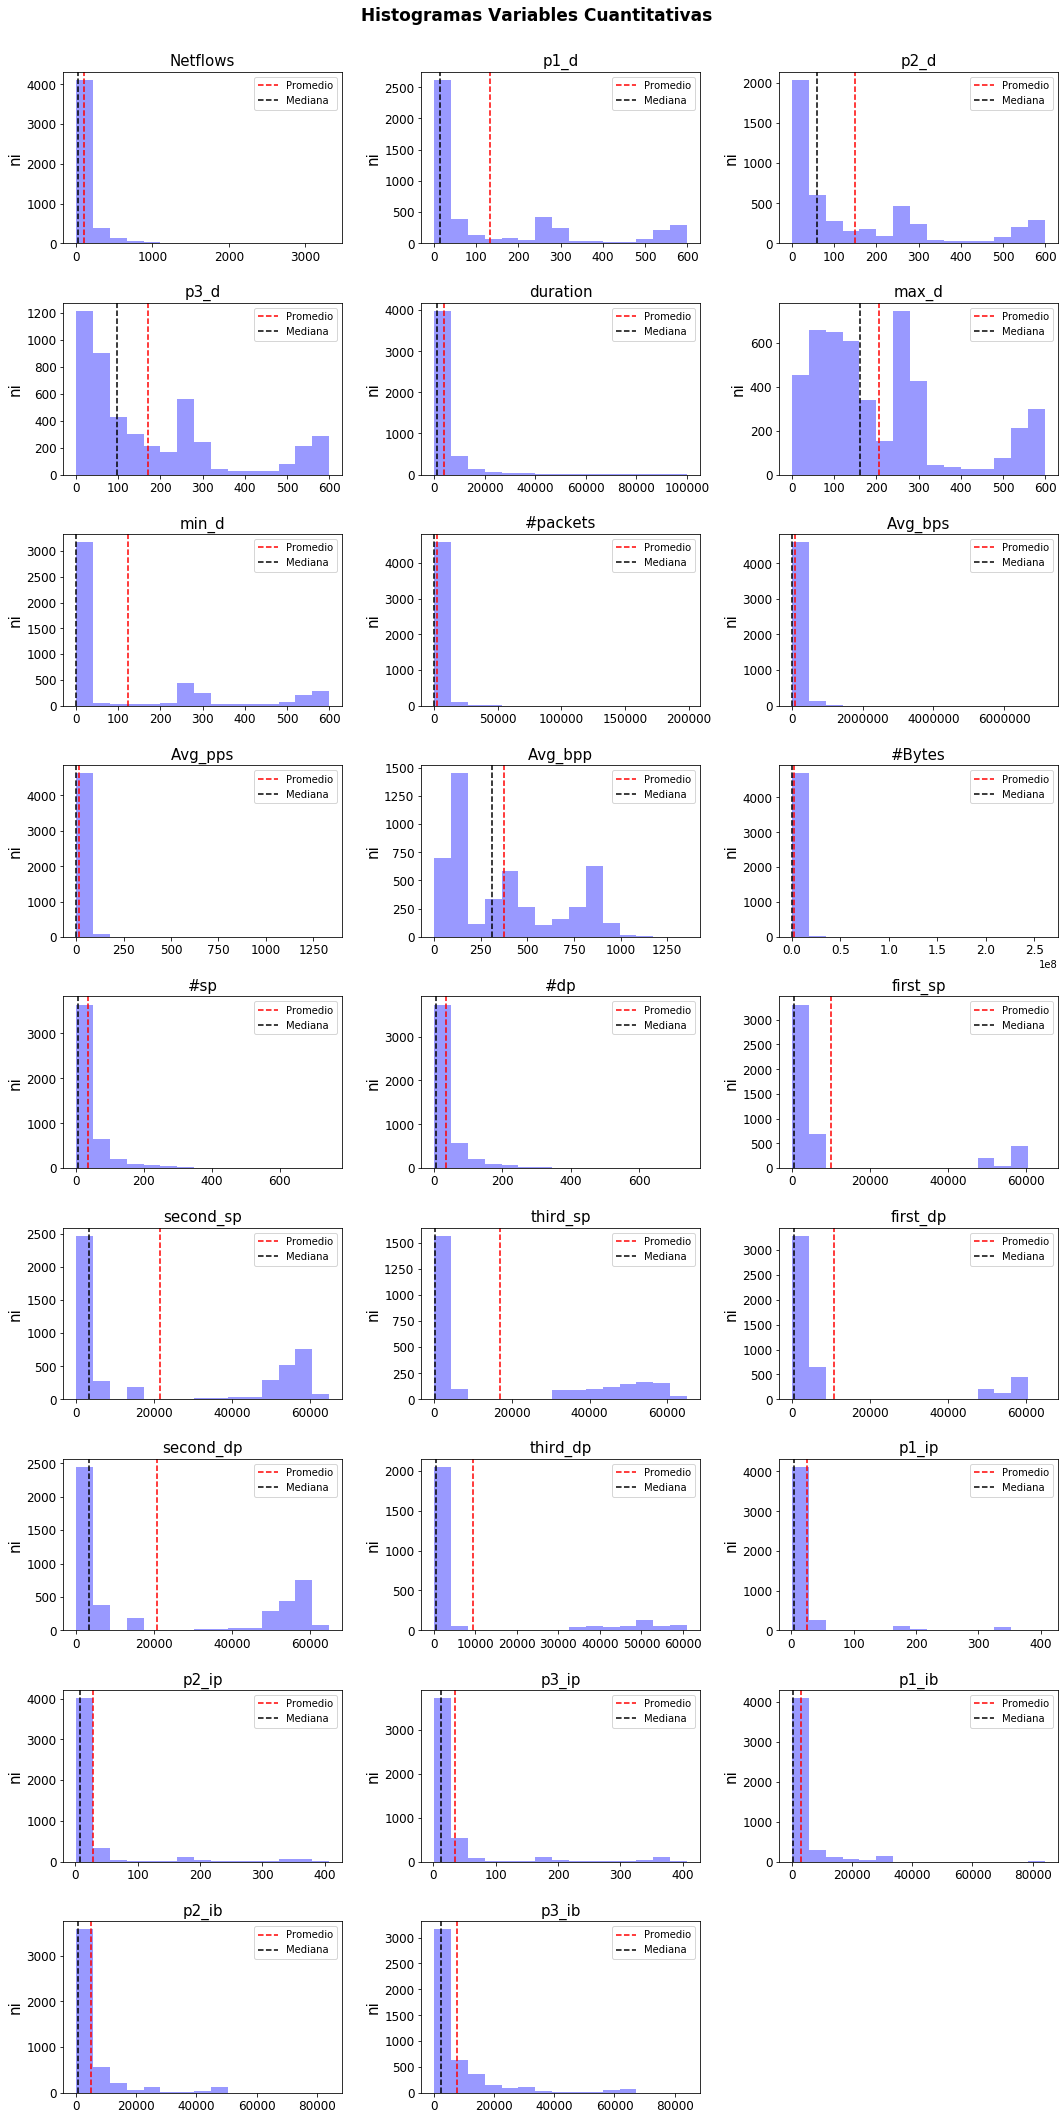

In [132]:
fig, ax = plt.subplots(nrows = 9, ncols = 3, figsize = (15,30))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.distplot(data[col], bins=15,color='blue', kde=False, ax = ax[i])
    ax[i].axvline(data[col].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax[i].axvline(data[col].median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_ylabel('ni',size=15)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Histogramas Variables Cuantitativas', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[26])

In [133]:
data_numeric
tables_frequency = []
for j, i in enumerate(data_numeric):
    tables_frequency.append(made_frequency_table_A(i, data,1, data_numeric[j]))


display(tables_frequency)

[            Netflows    ni           fi    Ni        Fi    Xí
 0         (1, 277.0)  4269     0.901965  4269  0.901965   139
 1     (277.0, 553.0)   309    0.0652863  4578  0.967251   415
 2     (553.0, 829.0)   100    0.0211282  4678  0.988379   691
 3    (829.0, 1105.0)    35   0.00739489  4713  0.995774   967
 4   (1105.0, 1381.0)    10   0.00211282  4723  0.997887  1243
 5   (1381.0, 1657.0)     4   0.00084513  4727  0.998732  1519
 6   (1657.0, 1933.0)     2  0.000422565  4729  0.999155  1795
 7   (1933.0, 2209.0)     0            0  4729  0.999155  2071
 8   (2209.0, 2485.0)     1  0.000211282  4730  0.999366  2347
 9   (2485.0, 2761.0)     0            0  4730  0.999366  2623
 10  (2761.0, 3037.0)     2  0.000422565  4732  0.999789  2899
 11  (3037.0, 3313.0)     1  0.000211282  4733         1  3175
 12             Total  4733                                   ,
                       p1_d    ni          fi    Ni        Fi       Xí
 0          (0.0, 49.96108)  2771    0.585464 

### Valores atípicos

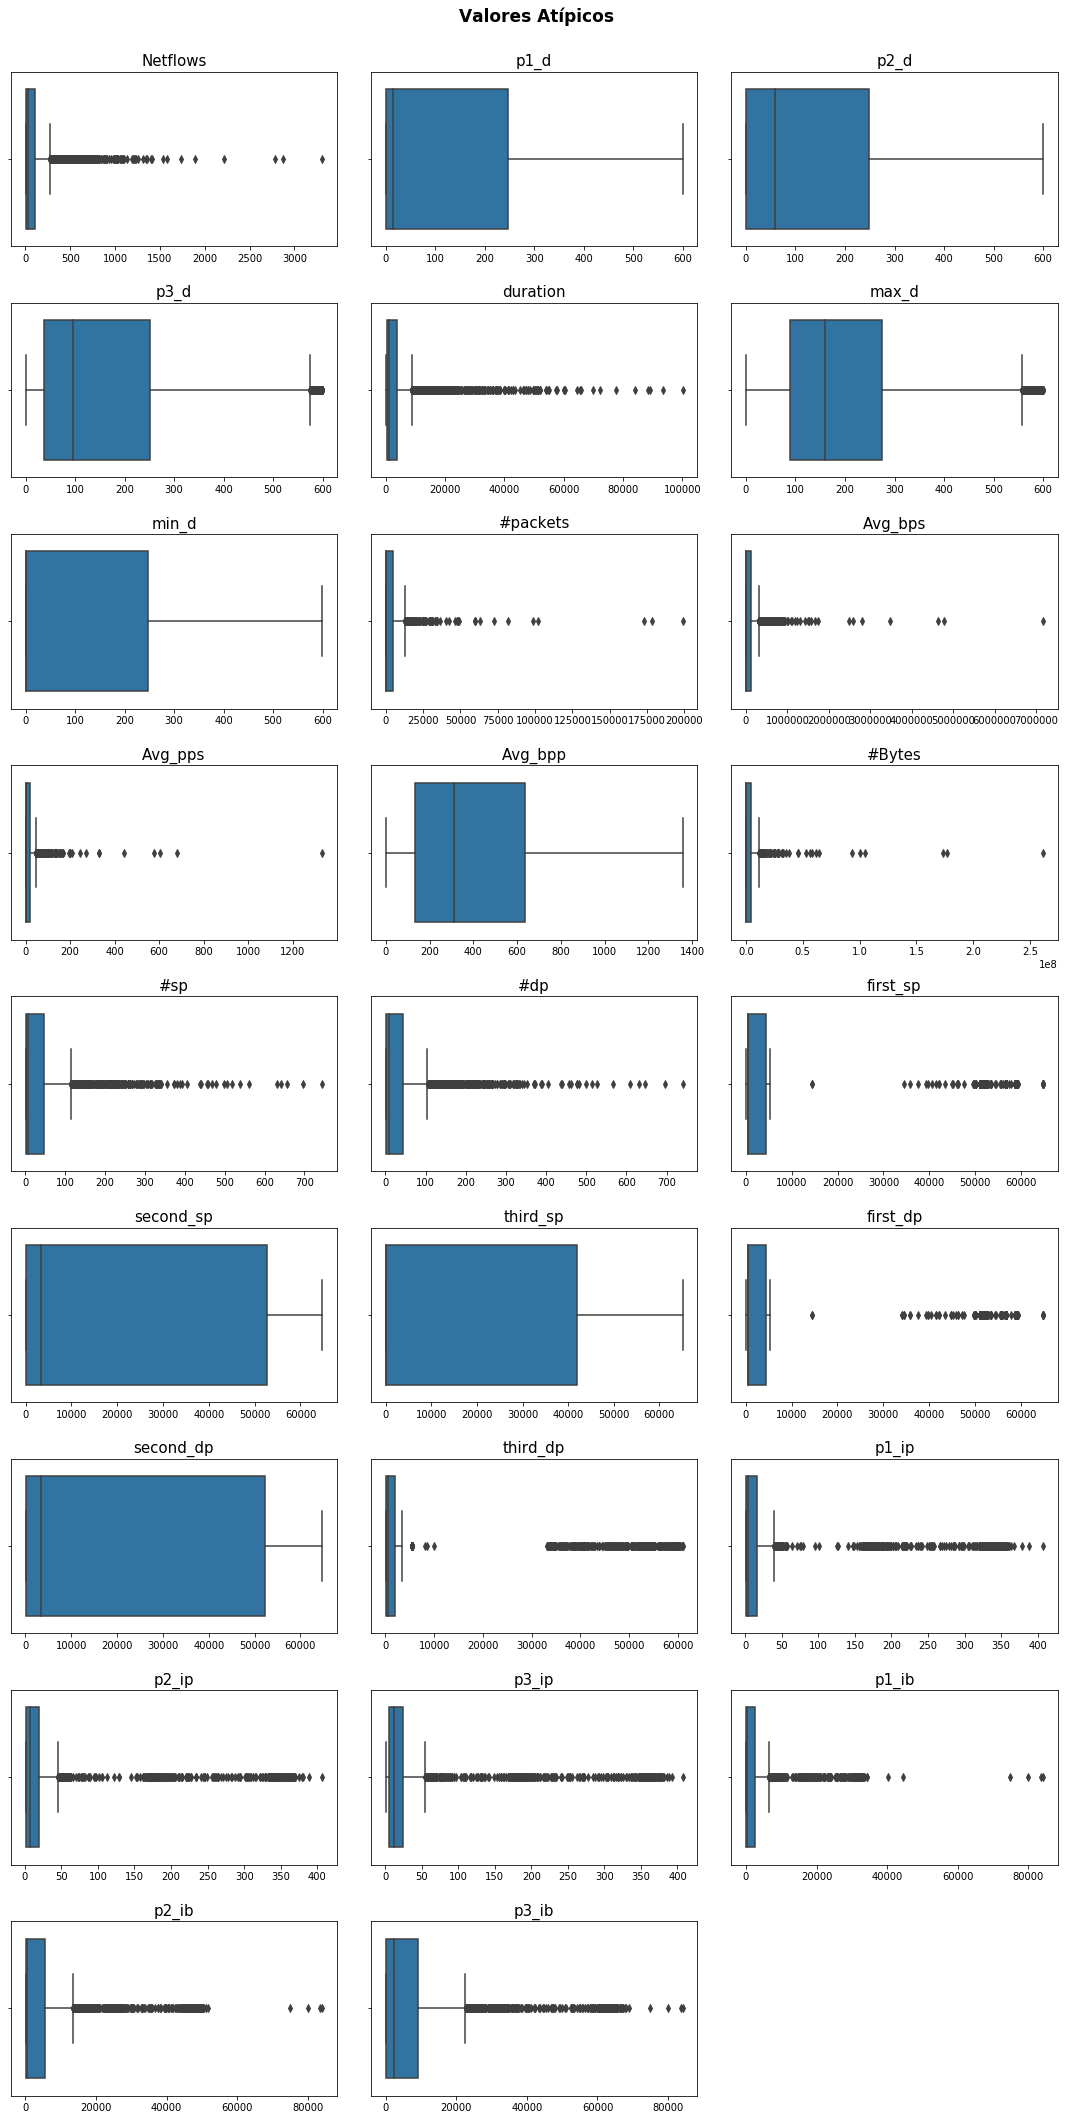

In [134]:
fig, ax = plt.subplots(nrows = 9, ncols=3, figsize = (15,30))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.boxplot(
        x = data[col],
        ax = ax[i]
    )
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 10)
    ax[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Valores Atípicos', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[26])

In [136]:
reporte_atipicos = pd.DataFrame(columns = data_numeric, index = ['Borde_Inferior','Q1','Q2','Q3','Ric','Borde_Superior','Atip_s','Atip_i','Atip_Total','Porcentaje_Atipicos'])

for i, m in enumerate(data_numeric):
    temp = []
    q1 = data[m].quantile(0.25)
    q3 = data[m].quantile(0.75)
    q2 = data[m].quantile(0.5)
    ric = q3-q1
    borde_s = q3 + 1.5*ric
    borde_i = q1-1.5*ric
    atip_s = data[data[m]>borde_s].shape[0]
    atip_i = data[data[m]<borde_i].shape[0]
    t = atip_s + atip_i
    p = (t/(data.shape[0]))*100
   
    temp.append(borde_i)
    temp.append(q1)
    temp.append(q2)
    temp.append(q3)
    temp.append(ric)
    temp.append(borde_s)
    temp.append(atip_s)
    temp.append(atip_i)
    temp.append(t)
    temp.append(p)
    reporte_atipicos[m] = temp
    
    

print(colored(f'Reporte cuantitativo de los datos atípicos', attrs=['bold']))    
display(reporte_atipicos.T)    

Reporte cuantitativo de los datos atípicos


,Borde_Inferior,Q1,Q2,Q3,Ric,Borde_Superior,Atip_s,Atip_i,Atip_Total,Porcentaje_Atipicos
Netflows,-1.600000e+02,2.000,23.0000,1.100000e+02,1.080000e+02,2.720000e+02,471.0,0.0,471.0,9.951405
p1_d,-3.713989e+02,0.000,13.9345,2.475993e+02,2.475993e+02,6.189981e+02,0.0,0.0,0.0,0.000000
p2_d,-3.704370e+02,0.813,58.3345,2.483130e+02,2.475000e+02,6.195630e+02,0.0,0.0,0.0,0.000000
p3_d,-2.845141e+02,37.342,96.0300,2.519127e+02,2.145707e+02,5.737689e+02,197.0,0.0,197.0,4.162265
duration,-4.433150e+03,524.756,1055.2150,3.830027e+03,3.305271e+03,8.787933e+03,562.0,0.0,562.0,11.874076
max_d,-1.933900e+02,88.019,159.9850,2.756250e+02,1.876060e+02,5.570340e+02,307.0,0.0,307.0,6.486372
min_d,-3.711840e+02,0.000,0.0000,2.474560e+02,2.474560e+02,6.186400e+02,0.0,0.0,0.0,0.000000
#packets,-7.525500e+03,54.000,332.0000,5.107000e+03,5.053000e+03,1.268650e+04,158.0,0.0,158.0,3.338263
Avg_bps,-1.869145e+05,491.000,1279.0000,1.254280e+05,1.249370e+05,3.128335e+05,360.0,0.0,360.0,7.606169
Avg_pps,-2.850000e+01,0.000,1.0000,1.900000e+01,1.900000e+01,4.750000e+01,425.0,0.0,425.0,8.979506
